In [1]:
DATA_PATH = "../data/Processed/CarsProcessed.csv"
FIG_DIR = "../report/Figures"

In [49]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import plotly.express as px 
import matplotlib.pyplot as plt
from datasist.structdata import detect_outliers
import os 

In [3]:
df = pd.read_csv(DATA_PATH)
df.shape

(426, 17)

In [4]:
df.sample(3)

,Unnamed: 0,make,model,type,origin,drivetrain,msrp_($),invoice_($),enginesize,cylinders,horsepower,mpg_city,mpg_highway,weight,wheelbase,length,profit
286,292,Mitsubishi,Outlander LS,SUV,Asia,Front,18892.0,17569.0,2.4,4.0,160.0,21.0,27.0,3240.0,103.0,179.0,1323.0
54,56,Buick,Park Avenue Ultra 4dr,Sedan,USA,Front,40720.0,36927.0,3.8,6.0,240.0,18.0,28.0,3909.0,114.0,207.0,3793.0
311,317,Nissan,Frontier King Cab XE V6,Truck,Asia,All,19479.0,18253.0,3.3,6.0,180.0,17.0,20.0,3932.0,116.0,191.0,1226.0


In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)

# • Univariate Analysis 

## What is the distribution of make?

In [51]:
fig1 = px.histogram(df, x='make', 
                   labels={'make': 'Make'}, 
                   title='Distribution of Car Makes',
                   text_auto=True).update_xaxes(categoryorder='total ascending')
fig1.show()

In [52]:
fig1.write_html(os.path.join(FIG_DIR, 'Distribution of Make.html'))

## What is the distribution of type?

In [53]:
type_counts = df['type'].value_counts()
fig2 = px.pie(names=type_counts.index,
             values=type_counts.values,
             title='Distribution of Car Types',
             labels={'values': 'Count', 'names': 'Type'}).update_traces(textposition='inside', textinfo='percent+label')
fig2.show()

In [54]:
fig2.write_html(os.path.join(FIG_DIR, 'Distribution of Type.html'))

## What is the distribution of Origin?

In [55]:
origin_counts = df['origin'].value_counts()
fig3 = px.pie(origin_counts, values=origin_counts.values, names=origin_counts.index,
             title='Distribution of Car Origins')

fig3.show()

In [56]:
fig3.write_html(os.path.join(FIG_DIR, 'Distribution of Origin.html'))

### What is the distribution of drivetrain?


In [60]:
drivetrain_counts = df['drivetrain'].value_counts()
fig4 = px.pie(names=drivetrain_counts.index,
             values=drivetrain_counts.values,
             title='Distribution of Car Drivetrains',
             labels={'values': 'Count', 'names': 'Drivetrain'}).update_traces(textposition='inside', textinfo='percent+label')
fig4.show()

In [61]:
fig4.write_html(os.path.join(FIG_DIR, 'Distribution of Drivetrain.html'))

### What is the distribution of MSRP?

In [62]:
fig5 = px.box(df, y='msrp_($)', 
             title='Distribution of Car MSRP',
             labels={'msrp_($)': 'MSRP ($)'})

fig5.show()

In [11]:
otlr_idx = detect_outliers(df , 0 , ['msrp_($)'])
len(otlr_idx)

27

In [63]:
fig5.write_html(os.path.join(FIG_DIR, 'Distribution of MSRP.html'))

### What is the distribution of Invoice?

In [64]:
fig6 = px.box(df, y='invoice_($)', 
             title='Distribution of Car Invoice',
             labels={'invoice_($)': 'Invoice ($)'})

fig6.show()

In [13]:
otlr_idx = detect_outliers(df , 0 , ['invoice_($)'])
len(otlr_idx)

27

In [65]:
fig6.write_html(os.path.join(FIG_DIR, 'Distribution of Invoice.html'))

# •	Bivariate Analysis 

In [32]:
px.imshow(df.select_dtypes('number').corr() , text_auto=True)

### How does invoice relate to msrp?

In [66]:
fig7 = px.scatter(df, x='msrp_($)', y='invoice_($)', title='Invoice vs MSRP')
fig7.show()

In [67]:
fig7.write_html(os.path.join(FIG_DIR, 'Relationship between Invoice and MSRP.html'))

### How does the invoice price vary across different types of vehicles?

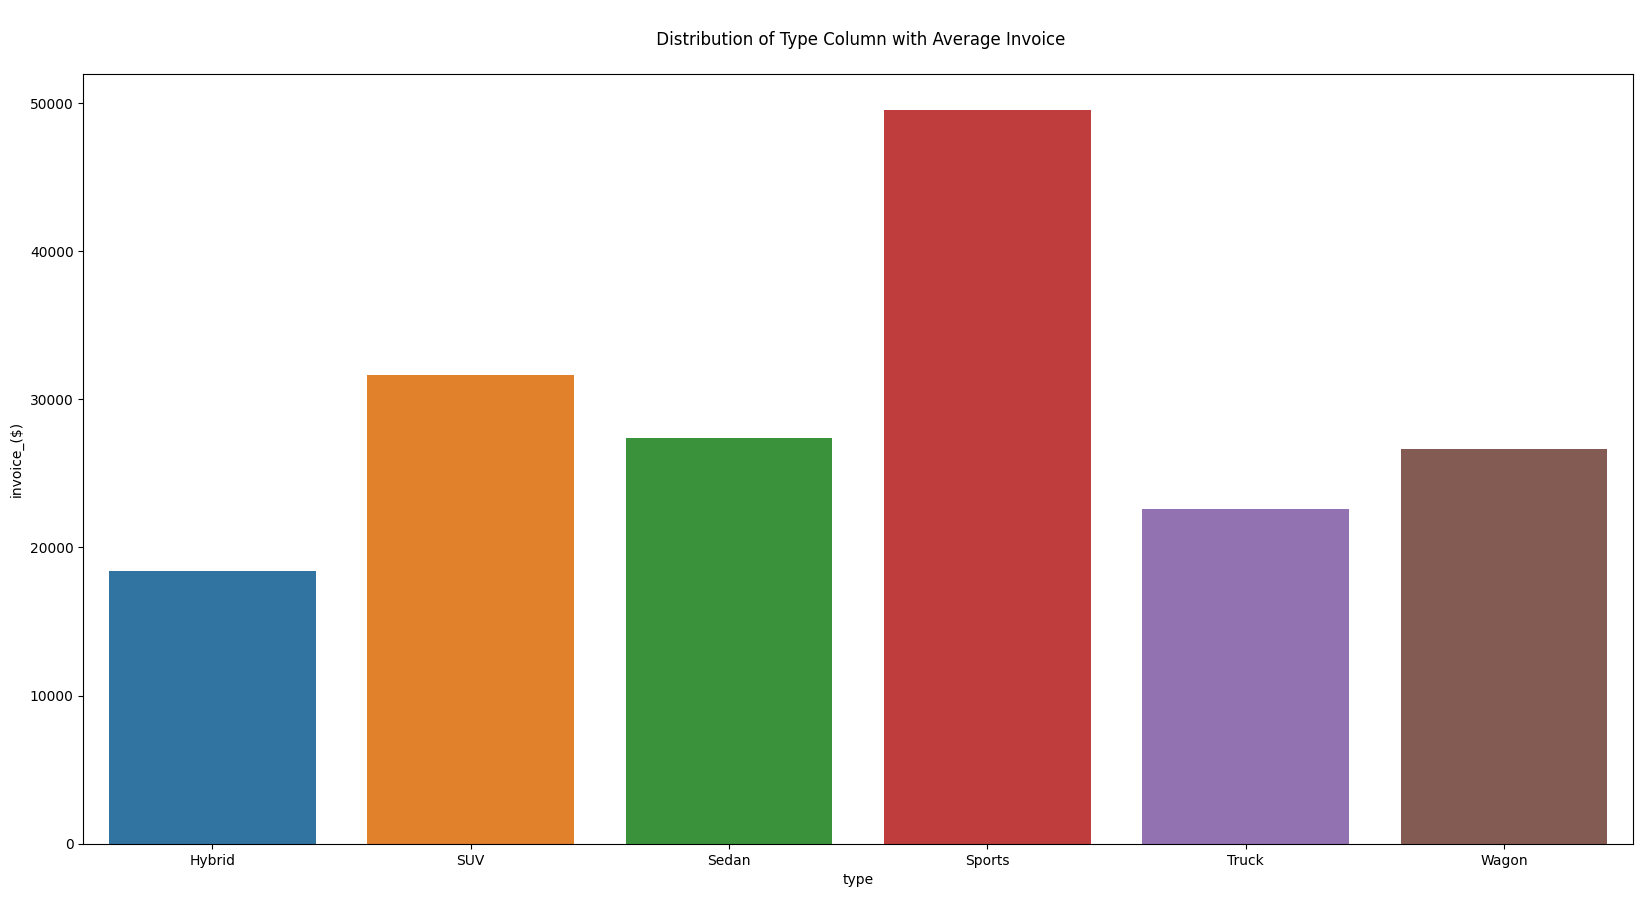

In [72]:
avg_invoice = df.groupby('type')['invoice_($)'].mean().reset_index()
plt.figure(figsize=(20, 10))
plt.title('\n Distribution of Type Column with Average Invoice\n')
sns.barplot(x='type', y='invoice_($)', data=avg_invoice, hue='type')
plt.show()

### How does the distribution of vehicle manufacturers vary across different types of cars ?

In [77]:
fig10 = px.histogram(df, x = "make",
                  color = "type",text_auto=True,
                  labels = {"Make":"Manufacturer"},
                  title = "Make of The Cars Vs Type")
                  
fig10.show()

In [78]:
fig10.write_html(os.path.join(FIG_DIR, 'Relationship between Make and Type.html'))

### How would you show the relationship between a car's weight and its invoice amount?

In [79]:
fig11 = px.scatter(df, x='weight', y='invoice_($)',
                 title='Relationship between Weight and Invoice ($)',
                 labels={'Weight': 'Weight (lbs)', 'Invoice': 'Invoice ($)'})

fig11.show()

In [80]:
fig11.write_html(os.path.join(FIG_DIR, 'Relationship between Invoice and Weight.html'))

### How can you visualize the average profit for each vehicle type ?

In [81]:
avg_profit_per_type = df.groupby('type')['profit'].mean().reset_index()
fig12 = px.bar(avg_profit_per_type, x='type', y='profit',
             title='Average Profit per Vehicle Type',text_auto=True,
             labels={'type': 'Vehicle Type', 'profit': 'Average Profit ($)'}).update_xaxes(categoryorder='total ascending') 

fig12.show()

In [82]:
fig12.write_html(os.path.join(FIG_DIR, 'Relationship between Average Profit per Vehicle Type.html'))

### What is the average invoice amount distribution across different drivetrain types?

In [105]:
avg_invoice_by_drivetrain = df.groupby('drivetrain')['invoice_($)'].mean().reset_index()
fig13 = px.histogram(avg_invoice_by_drivetrain, x='drivetrain', y='invoice_($)', 
                     title='Average Invoice Amount by Drivetrain',text_auto=True,
                     labels={'drivetrain': 'Drivetrain', 'invoice_($)': 'Average Invoice ($)'}).update_xaxes(categoryorder='total ascending') 
fig13.show()

In [107]:
fig13.write_html(os.path.join(FIG_DIR, 'Relationship between Average Invoice Amount by Drivetrain.html'))

### How does the average invoice amount vary with horsepower ?

In [86]:
avg_invoice_by_horsepower = df.groupby('horsepower')['invoice_($)'].mean().reset_index()
fig14 = px.scatter(avg_invoice_by_horsepower, x='horsepower', y='invoice_($)',
                 title='Average Invoice Amount by Horsepower',
                 labels={'horsepower': 'Horsepower', 'invoice_($)': 'Average Invoice ($)'})
fig14.show()

In [87]:
fig14.write_html(os.path.join(FIG_DIR, 'Relationship between Average Invoice Amount by Horsepower.html'))

###  How does the average profitability differ across various drivetrain types ?

In [92]:
avg_profit_by_drivetrain = df.groupby('drivetrain')['profit'].mean().reset_index()
fig15 = px.bar(avg_profit_by_drivetrain, x='drivetrain', y='profit',
             title='Average Profit by Drivetrain',text_auto=True,
             labels={'drivetrain': 'Drivetrain', 'profit': 'Average Profit ($)'}).update_xaxes(categoryorder='total ascending')
fig15.show()

In [93]:
fig15.write_html(os.path.join(FIG_DIR, 'Relationship between Average Profit by Drivetrain.html'))

# • Multivariate Analysis

### How does the distribution of vehicle types vary across different origins and drivetrains ?

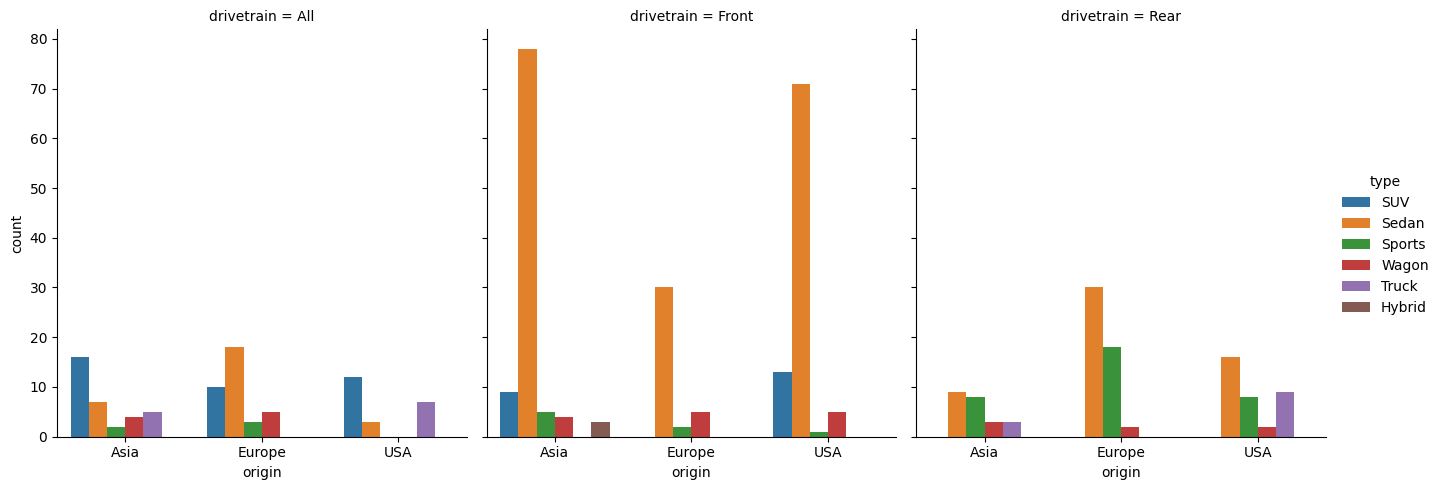

In [100]:
fig19=sns.catplot(x="origin", hue="type", col="drivetrain",
                data=df, kind="count",
                height=5, aspect=.9)


### How do Invoice, Origin, and Type of vehicle relate?

In [94]:
avg_invoice = df.groupby(['type', 'origin'])['invoice_($)'].mean().reset_index()
fig16 = px.bar(avg_invoice, x='type', y='invoice_($)', color='origin',
             title='Average Invoice by Vehicle Type and Origin',text_auto=True,barmode="group",
             labels={'type': 'Vehicle Type', 'invoice_($)': 'Average Invoice_ ($)', 'Origin': 'Origin'})
fig16.show()

In [95]:
fig16.write_html(os.path.join(FIG_DIR, 'Relationship between Average Invoice by Vehicle Type and Origin.html'))

### Total profit per manufacturer for each origin ?

In [96]:
total_profit_per_manufacturer_origin = df.groupby(['make', 'origin'])['profit'].sum().reset_index()
fig17 = px.bar(total_profit_per_manufacturer_origin, x='make', y='profit', color='origin',
             title='Total Profit per Manufacturer for Each Origin',text_auto=True,
             labels={'make': 'Manufacturer', 'profit': 'Total Profit ($)', 'origin': 'Origin'})
fig17.show()

In [97]:
fig17.write_html(os.path.join(FIG_DIR, 'Relationship between Total Profit per Manufacturer for Each Origin.html'))

### Total profit per type for each origin ?

In [98]:
total_profit_per_manufacturer_origin = df.groupby(['type', 'origin'])['profit'].sum().reset_index()
fig18 = px.bar(total_profit_per_manufacturer_origin, x='type', y='profit', color='origin',
             title='Total Profit per Type for Each Origin',text_auto=True,barmode="group",
             labels={'type': 'Type', 'profit': 'Total Profit ($)', 'origin': 'Origin'})
fig18.show()

In [99]:
fig18.write_html(os.path.join(FIG_DIR, 'Relationship between Total Profit per Type for Each Origin.html'))